In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when, col

In [2]:
# Build the SparkSession
spark = SparkSession.builder \
   .master("local") \
   .appName("DDAM Project") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()
   
sc = spark.sparkContext

# Import

In [40]:
df_boxscore = spark.read.csv("data/boxscore.csv", header=True, inferSchema=True)
df_games = spark.read.csv("data/games.csv", header=True, inferSchema=True)
df_salaries = spark.read.csv("data/salaries.csv", header=True, inferSchema=True)
df_playerInfo = spark.read.csv("data/player_info.csv", header=True, inferSchema=True)

In [4]:
print(df_boxscore.count(), df_games.count(), df_salaries.count(), df_playerInfo.count())

741569 30250 11583 5018


In [5]:
df_boxscore.show(5)

+-------+----------------+------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|game_id|        teamName|        playerName|   MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|
+-------+----------------+------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|      1|Sacramento Kings|Corliss Williamson|37:20|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|
|      1|Sacramento Kings|    Mitch Richmond|32:00|  6| 12|  1|  4|  1|  1|  0|  5|  5|  3|  1|  2|  3|  1| 14|-12|        1|
|      1|Sacramento Kings|    Olden Polynice|31:34|  0|  4|  0|  0|  1|  4|  2|  5|  7|  3|  1|  0|  4|  3|  1|-12|        1|
|      1|Sacramento Kings|Mahmoud Abdul-Rauf|29:27|  7| 13|  1|  2|  2|  2|  0|  2|  2|  5|  1|  1|  2|  2| 17| -7|        1|
|      1|Sacramento Kings|       Brian Grant|25:13|  3| 11|  0|  0|  2|  2|  1|  5|  6|  0|  0|  2|  1|  2|  8| -7|   

In [6]:
df_games.show(5)

+---------------+--------------------+----------+--------------------+----------+----------+-----+-------+----------+---------+-------+
|seasonStartYear|            awayTeam|pointsAway|            homeTeam|pointsHome|attendance|notes|startET|  datetime|isRegular|game_id|
+---------------+--------------------+----------+--------------------+----------+----------+-----+-------+----------+---------+-------+
|           1996|    Sacramento Kings|        85|     Houston Rockets|        96|   16285.0| NULL|   NULL|1996-11-01|        1|      1|
|           1996|Los Angeles Clippers|        97|Golden State Warr...|        85|   15593.0| NULL|   NULL|1996-11-01|        1|      2|
|           1996|Portland Trail Bl...|       114| Vancouver Grizzlies|        85|   19193.0| NULL|   NULL|1996-11-01|        1|      3|
|           1996| Seattle SuperSonics|        91|           Utah Jazz|        99|   19911.0| NULL|   NULL|1996-11-01|        1|      4|
|           1996|     New York Knicks|       107

In [7]:
df_salaries.show(5)

+----------------+---------------+-----------+------------------+
|      playerName|seasonStartYear|     salary|inflationAdjSalary|
+----------------+---------------+-----------+------------------+
|  Michael Jordan|           1996|$30,140,000|       $52,258,566|
|    Horace Grant|           1996|$14,857,000|       $25,759,971|
|   Reggie Miller|           1996|$11,250,000|       $19,505,934|
|Shaquille O'Neal|           1996|$10,714,000|       $18,576,585|
|     Gary Payton|           1996|$10,212,000|       $17,706,187|
+----------------+---------------+-----------+------------------+
only showing top 5 rows



In [8]:
df_playerInfo.show(5)

+--------------------+----+----+---+----+-----+----------------+--------------------+
|          playerName|From|  To|Pos|  Ht|   Wt|       birthDate|            Colleges|
+--------------------+----+----+---+----+-----+----------------+--------------------+
|      Alaa Abdelnaby|1991|1995|F-C|6-10|240.0|   June 24, 1968|                Duke|
|     Zaid Abdul-Aziz|1969|1978|C-F| 6-9|235.0|   April 7, 1946|          Iowa State|
|Kareem Abdul-Jabbar*|1970|1989|  C| 7-2|225.0|  April 16, 1947|                UCLA|
|  Mahmoud Abdul-Rauf|1991|2001|  G| 6-1|162.0|   March 9, 1969|                 LSU|
|   Tariq Abdul-Wahad|1998|2003|  F| 6-6|223.0|November 3, 1974|Michigan, San Jos...|
+--------------------+----+----+---+----+-----+----------------+--------------------+
only showing top 5 rows



# removing columns and dates

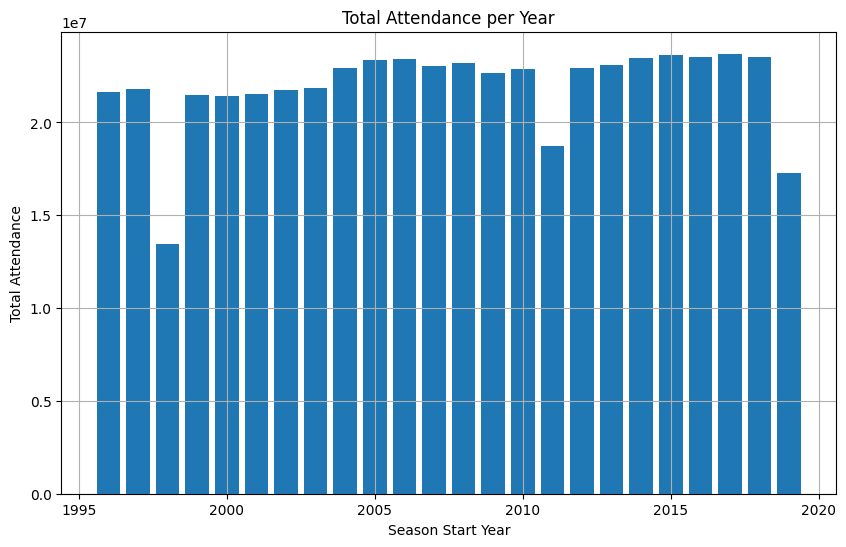

In [9]:
from pyspark.sql.functions import sum
import matplotlib.pyplot as plt

df_sum = df_games.groupBy("seasonStartYear").agg(sum("attendance").alias("total_attendance"))

# Convert Spark DataFrame to Pandas DataFrame
pandas_df_sum = df_sum.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(pandas_df_sum["seasonStartYear"], pandas_df_sum["total_attendance"])
plt.title("Total Attendance per Year")
plt.xlabel("Season Start Year")
plt.ylabel("Total Attendance")
plt.grid(True)
plt.show()

In [10]:
#removing notes and startET from df_games
columns_to_drop = ["awayTeam", "pointsAway", "homeTeam", "pointsHome", "attendance", "notes", "startET", "datetime"]

# Drop the specified columns
df_games = df_games.drop(*columns_to_drop)

# Show the first 5 rows of the updated df_games DataFrame
df_games.show(5)

+---------------+---------+-------+
|seasonStartYear|isRegular|game_id|
+---------------+---------+-------+
|           1996|        1|      1|
|           1996|        1|      2|
|           1996|        1|      3|
|           1996|        1|      4|
|           1996|        1|      5|
+---------------+---------+-------+
only showing top 5 rows



In [11]:
df_games = df_games.filter((col("seasonStartYear") != 1998) & (col("seasonStartYear") != 2011) & (col("seasonStartYear") != 2019))
df_games.show(5)

+---------------+---------+-------+
|seasonStartYear|isRegular|game_id|
+---------------+---------+-------+
|           1996|        1|      1|
|           1996|        1|      2|
|           1996|        1|      3|
|           1996|        1|      4|
|           1996|        1|      5|
+---------------+---------+-------+
only showing top 5 rows



In [12]:
df_salaries = df_salaries.filter((col("seasonStartYear") != 1998) & (col("seasonStartYear") != 2011) & (col("seasonStartYear") != 2019))
df_salaries.show(5)

+----------------+---------------+-----------+------------------+
|      playerName|seasonStartYear|     salary|inflationAdjSalary|
+----------------+---------------+-----------+------------------+
|  Michael Jordan|           1996|$30,140,000|       $52,258,566|
|    Horace Grant|           1996|$14,857,000|       $25,759,971|
|   Reggie Miller|           1996|$11,250,000|       $19,505,934|
|Shaquille O'Neal|           1996|$10,714,000|       $18,576,585|
|     Gary Payton|           1996|$10,212,000|       $17,706,187|
+----------------+---------------+-----------+------------------+
only showing top 5 rows



In [13]:
#game_id that are played between 2000 and 2010
selected_game_ids = df_games.select("game_id").distinct()

#filter salaries based on game_id

df_boxscore = df_boxscore.join(selected_game_ids, "game_id")

df_boxscore.show(5)

+-------+----------------+------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|game_id|        teamName|        playerName|   MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|
+-------+----------------+------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|      1|Sacramento Kings|Corliss Williamson|37:20|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|
|      1|Sacramento Kings|    Mitch Richmond|32:00|  6| 12|  1|  4|  1|  1|  0|  5|  5|  3|  1|  2|  3|  1| 14|-12|        1|
|      1|Sacramento Kings|    Olden Polynice|31:34|  0|  4|  0|  0|  1|  4|  2|  5|  7|  3|  1|  0|  4|  3|  1|-12|        1|
|      1|Sacramento Kings|Mahmoud Abdul-Rauf|29:27|  7| 13|  1|  2|  2|  2|  0|  2|  2|  5|  1|  1|  2|  2| 17| -7|        1|
|      1|Sacramento Kings|       Brian Grant|25:13|  3| 11|  0|  0|  2|  2|  1|  5|  6|  0|  0|  2|  1|  2|  8| -7|   

In [14]:
"""df_playerInfo = df_playerInfo.withColumn("From", df_playerInfo["From"].cast("int"))
df_playerInfo = df_playerInfo.withColumn("To", df_playerInfo["To"].cast("int"))

# Filter rows where the player played between 2000 and 2010
df_playerInfo = df_playerInfo.filter((col("From") >= 2000) & (col("To") <= 2010))

# Show the resulting DataFrame
df_playerInfo.show()"""

'df_playerInfo = df_playerInfo.withColumn("From", df_playerInfo["From"].cast("int"))\ndf_playerInfo = df_playerInfo.withColumn("To", df_playerInfo["To"].cast("int"))\n\n# Filter rows where the player played between 2000 and 2010\ndf_playerInfo = df_playerInfo.filter((col("From") >= 2000) & (col("To") <= 2010))\n\n# Show the resulting DataFrame\ndf_playerInfo.show()'

In [41]:
#for the moment, in df_playerInfo we will not drop the rows that contains player that did not played in between 2000-2010
#because we will do it later with a join

#removing notes and startET from df_games
columns_to_drop = ["From", "To", "birthDate", "Colleges"]

# Drop the specified columns
df_playerInfo = df_playerInfo.drop(*columns_to_drop)

# Show the first 5 rows of the updated df_games DataFrame
df_playerInfo.show(5)

+--------------------+---+----+-----+
|          playerName|Pos|  Ht|   Wt|
+--------------------+---+----+-----+
|      Alaa Abdelnaby|F-C|6-10|240.0|
|     Zaid Abdul-Aziz|C-F| 6-9|235.0|
|Kareem Abdul-Jabbar*|  C| 7-2|225.0|
|  Mahmoud Abdul-Rauf|  G| 6-1|162.0|
|   Tariq Abdul-Wahad|  F| 6-6|223.0|
+--------------------+---+----+-----+
only showing top 5 rows



In [16]:
print(df_boxscore.count(), df_games.count(), df_salaries.count(), df_playerInfo.count())

666021 27242 10179 5018


# Missing values

In [17]:
from pyspark.sql.functions import col,isnan, when, count
df_boxscore.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_boxscore.columns]
   ).show()

+-------+--------+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|game_id|teamName|playerName| MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|
+-------+--------+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|      0|       0|         0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 87|        0|
+-------+--------+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+



In [18]:
#visualize the rows with +/- equal to NULL
rows_with_null = df_boxscore.filter(
    (col("+/-").isNull()))

rows_with_null.show()


+-------+--------------------+-----------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---------+
|game_id|            teamName|       playerName|  MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS| +/-|isStarter|
+-------+--------------------+-----------------+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+---------+
|    253| Cleveland Cavaliers|   Donny Marshall|0:01|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|NULL|        0|
|    334|      Denver Nuggets|    Melvin Booker|0:28|  1|  1|  1|  1|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  3|NULL|        0|
|    350|      Denver Nuggets|    Melvin Booker|0:52|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|NULL|        0|
|    353|     New York Knicks|     Scott Brooks|0:04|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|NULL|        0|
|    357|    Sacramento Kings|  Kevin Salvadori|0:00|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|

In [19]:
#visualize the rows with +/- equal to 0
filtered_rows = df_boxscore.filter(col("+/-") == "0")

filtered_rows.show(20)


+-------+--------------------+----------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|game_id|            teamName|      playerName|   MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|
+-------+--------------------+----------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|      1|     Houston Rockets|    Matt Bullard|13:38|  3|  5|  2|  3|  0|  0|  0|  2|  2|  2|  2|  0|  1|  0|  8|  0|        0|
|      4| Seattle SuperSonics|  Hersey Hawkins|31:35|  1|  3|  0|  2|  3|  4|  1|  4|  5|  1|  0|  0|  0|  1|  5|  0|        1|
|      4|           Utah Jazz|    Chris Morris| 8:03|  0|  3|  0|  3|  0|  0|  0|  3|  3|  0|  0|  0|  0|  1|  0|  0|        0|
|      5|     New York Knicks|   Larry Johnson|28:37|  4|  5|  0|  0|  4|  6|  1|  2|  3|  3|  1|  0|  4|  6| 12|  0|        1|
|      5|     New York Knicks|    Scott Brooks| 6:03|  0|  0|  0|  0|  0|  0|  0|  1|  1|  2|  2|  0|  2

In [20]:
#remove the columns with nulls
df_boxscore = df_boxscore.filter(col("+/-").isNotNull())

In [21]:
from pyspark.sql.functions import col,isnan, when, count
df_boxscore.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_boxscore.columns]
   ).show()

+-------+--------+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|game_id|teamName|playerName| MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|
+-------+--------+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+
|      0|       0|         0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|        0|
+-------+--------+----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+



In [22]:
from pyspark.sql.functions import col,isnan, when, count
df_salaries.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_salaries.columns]
   ).show()

+----------+---------------+------+------------------+
|playerName|seasonStartYear|salary|inflationAdjSalary|
+----------+---------------+------+------------------+
|         0|              0|     0|                 0|
+----------+---------------+------+------------------+



In [23]:
# Create a list comprehension to count null or NaN values for each column
counts_expr = [count(when(col(c).isNull(), c)).alias(c) if c != 'datetime' else count(when(col(c).isNull(), c)).alias(c+'_null_count') for c in df_games.columns]

# Apply the counts expression to the DataFrame
df_games.select(counts_expr).show()

+---------------+---------+-------+
|seasonStartYear|isRegular|game_id|
+---------------+---------+-------+
|              0|        0|      0|
+---------------+---------+-------+



In [24]:
from pyspark.sql.functions import col,isnan, when, count
df_playerInfo.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_playerInfo.columns]
   ).show()

+----------+---+---+---+
|playerName|Pos| Ht| Wt|
+----------+---+---+---+
|         0|  0|  0|  5|
+----------+---+---+---+



## Regression

In [42]:
df_playerInfo.show(5)

+--------------------+---+----+-----+
|          playerName|Pos|  Ht|   Wt|
+--------------------+---+----+-----+
|      Alaa Abdelnaby|F-C|6-10|240.0|
|     Zaid Abdul-Aziz|C-F| 6-9|235.0|
|Kareem Abdul-Jabbar*|  C| 7-2|225.0|
|  Mahmoud Abdul-Rauf|  G| 6-1|162.0|
|   Tariq Abdul-Wahad|  F| 6-6|223.0|
+--------------------+---+----+-----+
only showing top 5 rows



In [43]:
from pyspark.sql.functions import expr

# Split the "Ht" column into feet and inches
split_col = expr("split(Ht, '-')")
df_playerInfo = df_playerInfo.withColumn("feet", split_col.getItem(0).cast("double"))
df_playerInfo = df_playerInfo.withColumn("inches", split_col.getItem(1).cast("double"))

# Perform the conversion and overwrite the "Ht" column
conversion_expr = expr("feet * 30.48 + inches * 2.54")
df_playerInfo = df_playerInfo.withColumn("Ht", conversion_expr)

# Show the result
df_playerInfo.show(5)

+--------------------+---+------------------+-----+----+------+
|          playerName|Pos|                Ht|   Wt|feet|inches|
+--------------------+---+------------------+-----+----+------+
|      Alaa Abdelnaby|F-C|            208.28|240.0| 6.0|  10.0|
|     Zaid Abdul-Aziz|C-F|            205.74|235.0| 6.0|   9.0|
|Kareem Abdul-Jabbar*|  C|218.44000000000003|225.0| 7.0|   2.0|
|  Mahmoud Abdul-Rauf|  G|            185.42|162.0| 6.0|   1.0|
|   Tariq Abdul-Wahad|  F|            198.12|223.0| 6.0|   6.0|
+--------------------+---+------------------+-----+----+------+
only showing top 5 rows



In [44]:
from pyspark.sql.functions import col,isnan, when, count
df_playerInfo.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_playerInfo.columns]
   ).show()

+----------+---+---+---+----+------+
|playerName|Pos| Ht| Wt|feet|inches|
+----------+---+---+---+----+------+
|         0|  0|  0|  5|   0|     0|
+----------+---+---+---+----+------+



In [46]:
# Test
missing_values_df = df_playerInfo.filter(col("Wt").isNull())
test_set = missing_values_df

test_set.show()

+---------------+---+------+----+----+------+
|     playerName|Pos|    Ht|  Wt|feet|inches|
+---------------+---+------+----+----+------+
|       Dick Lee|  F|198.12|NULL| 6.0|   6.0|
|Murray Mitchell|  C|198.12|NULL| 6.0|   6.0|
|     Paul Nolen|  C|208.28|NULL| 6.0|  10.0|
|     Ray Wertis|  G|180.34|NULL| 5.0|  11.0|
|       Bob Wood|  G| 177.8|NULL| 5.0|  10.0|
+---------------+---+------+----+----+------+



In [48]:
# Train set
train_set = df_playerInfo.na.drop(subset=["Wt"])

train_set.show(5)

+--------------------+---+------------------+-----+----+------+
|          playerName|Pos|                Ht|   Wt|feet|inches|
+--------------------+---+------------------+-----+----+------+
|      Alaa Abdelnaby|F-C|            208.28|240.0| 6.0|  10.0|
|     Zaid Abdul-Aziz|C-F|            205.74|235.0| 6.0|   9.0|
|Kareem Abdul-Jabbar*|  C|218.44000000000003|225.0| 7.0|   2.0|
|  Mahmoud Abdul-Rauf|  G|            185.42|162.0| 6.0|   1.0|
|   Tariq Abdul-Wahad|  F|            198.12|223.0| 6.0|   6.0|
+--------------------+---+------------------+-----+----+------+
only showing top 5 rows



In [49]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

feature_columns = ["Ht"]
label_column = "Wt"

vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

linear_regression = LinearRegression(featuresCol="features", labelCol=label_column)
pipeline = Pipeline(stages=[vector_assembler, linear_regression])

model = pipeline.fit(train_set)

predictions = model.transform(test_set)

In [53]:
predictions.show()

+---------------+---+------+----+----+------+--------+------------------+
|     playerName|Pos|    Ht|  Wt|feet|inches|features|        prediction|
+---------------+---+------+----+----+------+--------+------------------+
|       Dick Lee|  F|198.12|NULL| 6.0|   6.0|[198.12]|209.37916596965968|
|Murray Mitchell|  C|198.12|NULL| 6.0|   6.0|[198.12]|209.37916596965968|
|     Paul Nolen|  C|208.28|NULL| 6.0|  10.0|[208.28]|232.94241645925237|
|     Ray Wertis|  G|180.34|NULL| 5.0|  11.0|[180.34]|168.14347761287243|
|       Bob Wood|  G| 177.8|NULL| 5.0|  10.0| [177.8]| 162.2526649904743|
+---------------+---+------+----+----+------+--------+------------------+



In [64]:
# Replace missing values
for value in [209.37916596965968, 209.37916596965968, 232.94241645925237, 168.14347761287243, 162.2526649904743]:
    df_playerInfo = df_playerInfo.fillna(value, subset=["Wt"])

In [65]:
df_playerInfo.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_playerInfo.columns]
   ).show()

+----------+---+---+---+----+------+
|playerName|Pos| Ht| Wt|feet|inches|
+----------+---+---+---+----+------+
|         0|  0|  0|  0|   0|     0|
+----------+---+---+---+----+------+



## Joins

In [26]:
#join boxscore and games (for the insertion of the data and the isRegular)
df_boxscore = df_boxscore.join(df_games, "game_id")
df_boxscore.show(20)

+-------+----------------+------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+
|game_id|        teamName|        playerName|   MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|
+-------+----------------+------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+
|      1|Sacramento Kings|Corliss Williamson|37:20|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|           1996|        1|
|      1|Sacramento Kings|    Mitch Richmond|32:00|  6| 12|  1|  4|  1|  1|  0|  5|  5|  3|  1|  2|  3|  1| 14|-12|        1|           1996|        1|
|      1|Sacramento Kings|    Olden Polynice|31:34|  0|  4|  0|  0|  1|  4|  2|  5|  7|  3|  1|  0|  4|  3|  1|-12|        1|           1996|        1|
|      1|Sacramento Kings|Mahmoud Abdul-Rauf|29:27|  7| 13|  1|  2|  2|  2|  0|  2|  2| 

In [27]:
#join boxscore and player_info (for the insertion of the Position, Ht and Wt)
df_boxscore = df_boxscore.join(df_playerInfo, "playerName")
df_boxscore.show(20)

+------------------+-------+--------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+
|        playerName|game_id|            teamName|   MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|Pos|  Ht|   Wt|
+------------------+-------+--------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+
|Corliss Williamson|      1|    Sacramento Kings|37:20|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|           1996|        1|  F| 6-7|245.0|
|    Olden Polynice|      1|    Sacramento Kings|31:34|  0|  4|  0|  0|  1|  4|  2|  5|  7|  3|  1|  0|  4|  3|  1|-12|        1|           1996|        1|C-F|6-11|220.0|
|Mahmoud Abdul-Rauf|      1|    Sacramento Kings|29:27|  7| 13|  1|  2|  2|  2|  0|  2|  2|  5|  1|  1|  2|  2| 17| -7|        1|           1996|

In [29]:
df_boxscore.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_playerInfo.columns]
   ).show()
print(df_boxscore.count())

+----------+---+---+---+
|playerName|Pos| Ht| Wt|
+----------+---+---+---+
|         0|  0|  0|  0|
+----------+---+---+---+

646071


In [78]:
player_occurrences = df_boxscore.groupBy("playerName").count()

# Show the result
player_occurrences.show()

+----------------+-----+
|      playerName|count|
+----------------+-----+
|     Terry Mills|  273|
|   Kosta Perović|   23|
|  Rodney Stuckey|  668|
| Al-Farouq Aminu|  664|
|   Greg Stiemsma|  228|
|  Brandon Ingram|  202|
|     Tyler Lydon|   64|
|  Svi Mykhailiuk|   60|
|Lonnie Walker IV|   36|
|   Michael Smith|  524|
|Shandon Anderson|  785|
|    Carl Herrera|  165|
|   Eric Williams|  676|
|    Bobby Phills|  183|
|   Lloyd Daniels|   39|
|  Terry Cummings|  171|
|  Ledell Eackles|   67|
|    Andre Miller| 1371|
|      Lee Nailon|  405|
|  Marcus Haislip|  206|
+----------------+-----+
only showing top 20 rows



In [79]:
#output_path = "data/df_boxscore_2000-2010"
#df_boxscore.write.csv(output_path, header=True, mode="overwrite")

In [80]:
print(df_boxscore.count(), df_salaries.count())

646071 10179


# managing data types

In [81]:
df_boxscore.printSchema()

root
 |-- playerName: string (nullable = true)
 |-- game_id: integer (nullable = true)
 |-- teamName: string (nullable = true)
 |-- MP: string (nullable = true)
 |-- FG: string (nullable = true)
 |-- FGA: string (nullable = true)
 |-- 3P: string (nullable = true)
 |-- 3PA: string (nullable = true)
 |-- FT: string (nullable = true)
 |-- FTA: string (nullable = true)
 |-- ORB: string (nullable = true)
 |-- DRB: string (nullable = true)
 |-- TRB: string (nullable = true)
 |-- AST: string (nullable = true)
 |-- STL: string (nullable = true)
 |-- BLK: string (nullable = true)
 |-- TOV: string (nullable = true)
 |-- PF: string (nullable = true)
 |-- PTS: string (nullable = true)
 |-- +/-: string (nullable = true)
 |-- isStarter: integer (nullable = true)
 |-- seasonStartYear: integer (nullable = true)
 |-- isRegular: integer (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Ht: string (nullable = true)
 |-- Wt: double (nullable = true)



In [82]:
# Assuming df_boxscore is your DataFrame
columns_to_check = ["FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "+/-"]

# Convert the specified columns to integers, and filter out the rows where the conversion fails
converted_df = df_boxscore.select(
    "*",
    *[col(c).cast("int").isNotNull().alias(c+"_is_int") for c in columns_to_check]
)

# Show the rows where conversion to integer failed
failed_conversion_rows = converted_df.filter(~col("FG_is_int") | ~col("FGA_is_int") |
                                              ~col("3P_is_int") | ~col("3PA_is_int") | ~col("FT_is_int") |
                                              ~col("FTA_is_int") | ~col("ORB_is_int") | ~col("DRB_is_int") |
                                              ~col("TRB_is_int") | ~col("AST_is_int") | ~col("STL_is_int") |
                                              ~col("BLK_is_int") | ~col("TOV_is_int") | ~col("PF_is_int") |
                                              ~col("PTS_is_int") | ~col("+/-_is_int"))

# Count the rows where conversion to integer failed
failed_conversion_count = failed_conversion_rows.count()

# Display the count and the first few rows where the conversion to integer failed
print("Number of rows with non-convertible string values:", failed_conversion_count)



Number of rows with non-convertible string values: 106900


In [83]:

# Assuming df_boxscore is your DataFrame
columns_to_convert = ["FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "+/-"]

# Convert the specified columns to integers and drop rows where conversion is not possible
for column in columns_to_convert:
    df_boxscore = df_boxscore.withColumn(column, col(column).cast("int"))

# Drop rows where any of the specified columns is null after conversion
df_boxscore = df_boxscore.dropna(subset=columns_to_convert)

# Show the first few rows after conversion and removal of rows with non-convertible values
df_boxscore.show(20)


+------------------+-------+--------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+
|        playerName|game_id|            teamName|   MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|Pos|  Ht|   Wt|
+------------------+-------+--------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+
|Corliss Williamson|      1|    Sacramento Kings|37:20|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|           1996|        1|  F| 6-7|245.0|
|    Olden Polynice|      1|    Sacramento Kings|31:34|  0|  4|  0|  0|  1|  4|  2|  5|  7|  3|  1|  0|  4|  3|  1|-12|        1|           1996|        1|C-F|6-11|220.0|
|Mahmoud Abdul-Rauf|      1|    Sacramento Kings|29:27|  7| 13|  1|  2|  2|  2|  0|  2|  2|  5|  1|  1|  2|  2| 17| -7|        1|           1996|

In [84]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Assuming df_boxscore is your DataFrame
def convert_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Create a user-defined function (UDF) for the conversion
convert_to_seconds_udf = udf(convert_to_seconds, IntegerType())

# Apply the UDF to the "MP" column and create a new "MP_seconds" column
df_boxscore = df_boxscore.withColumn("MP_seconds", convert_to_seconds_udf(col("MP")))

# Show the DataFrame with the new "MP_seconds" column
df_boxscore.show(20)


+------------------+-------+--------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+----------+
|        playerName|game_id|            teamName|   MP| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|Pos|  Ht|   Wt|MP_seconds|
+------------------+-------+--------------------+-----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+----------+
|Corliss Williamson|      1|    Sacramento Kings|37:20|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|           1996|        1|  F| 6-7|245.0|      2240|
|    Olden Polynice|      1|    Sacramento Kings|31:34|  0|  4|  0|  0|  1|  4|  2|  5|  7|  3|  1|  0|  4|  3|  1|-12|        1|           1996|        1|C-F|6-11|220.0|      1894|
|Mahmoud Abdul-Rauf|      1|    Sacramento Kings|29:27|  7| 13|  1|  2|  2|  2|  0|  2|  2

In [85]:
#removing notes and startET from df_games
columns_to_drop = ["MP"]

# Drop the specified columns
df_boxscore = df_boxscore.drop(*columns_to_drop)

# Show the first 5 rows of the updated df_games DataFrame
df_boxscore.show(5)

+------------------+-------+----------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+----------+
|        playerName|game_id|        teamName| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|Pos|  Ht|   Wt|MP_seconds|
+------------------+-------+----------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+----------+
|Corliss Williamson|      1|Sacramento Kings|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|           1996|        1|  F| 6-7|245.0|      2240|
|    Olden Polynice|      1|Sacramento Kings|  0|  4|  0|  0|  1|  4|  2|  5|  7|  3|  1|  0|  4|  3|  1|-12|        1|           1996|        1|C-F|6-11|220.0|      1894|
|Mahmoud Abdul-Rauf|      1|Sacramento Kings|  7| 13|  1|  2|  2|  2|  0|  2|  2|  5|  1|  1|  2|  2| 17| -7|        1|           1996|     

In [86]:
from pyspark.sql.functions import col,isnan, when, count
df_boxscore.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_boxscore.columns]
   ).show()

+----------+-------+--------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+---+---+----------+
|playerName|game_id|teamName| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|Pos| Ht| Wt|MP_seconds|
+----------+-------+--------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+---+---+----------+
|         0|      0|       0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|        0|              0|        0|  0|  0|  0|         0|
+----------+-------+--------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+---+---+----------+



In [87]:
df_boxscore.printSchema()

root
 |-- playerName: string (nullable = true)
 |-- game_id: integer (nullable = true)
 |-- teamName: string (nullable = true)
 |-- FG: integer (nullable = true)
 |-- FGA: integer (nullable = true)
 |-- 3P: integer (nullable = true)
 |-- 3PA: integer (nullable = true)
 |-- FT: integer (nullable = true)
 |-- FTA: integer (nullable = true)
 |-- ORB: integer (nullable = true)
 |-- DRB: integer (nullable = true)
 |-- TRB: integer (nullable = true)
 |-- AST: integer (nullable = true)
 |-- STL: integer (nullable = true)
 |-- BLK: integer (nullable = true)
 |-- TOV: integer (nullable = true)
 |-- PF: integer (nullable = true)
 |-- PTS: integer (nullable = true)
 |-- +/-: integer (nullable = true)
 |-- isStarter: integer (nullable = true)
 |-- seasonStartYear: integer (nullable = true)
 |-- isRegular: integer (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Ht: string (nullable = true)
 |-- Wt: double (nullable = true)
 |-- MP_seconds: integer (nullable = true)



In [88]:
print(df_boxscore.count(), df_salaries.count())

539171 10179


In [89]:
# Role cleaning and pre-processing
from pyspark.sql.functions import split, element_at

# Split the "name" column by space and select the first element
df_boxscore = df_boxscore.withColumn("pos_clean", element_at(split(df_boxscore["Pos"], "-"), 1))

# Show the updated DataFrame
df_boxscore.show()

+------------------+-------+--------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+----------+---------+
|        playerName|game_id|            teamName| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|Pos|  Ht|   Wt|MP_seconds|pos_clean|
+------------------+-------+--------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+---+----+-----+----------+---------+
|Corliss Williamson|      1|    Sacramento Kings|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|           1996|        1|  F| 6-7|245.0|      2240|        F|
|    Olden Polynice|      1|    Sacramento Kings|  0|  4|  0|  0|  1|  4|  2|  5|  7|  3|  1|  0|  4|  3|  1|-12|        1|           1996|        1|C-F|6-11|220.0|      1894|        C|
|Mahmoud Abdul-Rauf|      1|    Sacramento Kings|  7| 13|  1|  2|  2| 

In [90]:
# Drop the "age" column
df_boxscore = df_boxscore.drop("Pos")

In [ ]:
# Renaming
df_boxscore = df_boxscore.withColumnRenamed("pos_clean", "Position")

## Feature engineering

In [91]:
"""The way this stat helps to see the efficiency 
of a player is that it combines all 
the shots including free-throws, and gives a 
complete picture of how often a player scores. """


# Compute a new column True Shoot Percentage TSP
df_boxscore = df_boxscore.withColumn("TSP", when((2*(col("FGA")+(0.44*col("FTA")))) != 0, col("PTS")/(2*(col("FGA")+(0.44*col("FTA"))))).otherwise(0))


"""  effective field goal percentage shows how efficient the scorer is based on
the fact that perimeter shots are worth three points in fact this stats gi"""

# Compute a new column Effective Field Goal percentage EFG
df_boxscore = df_boxscore.withColumn("EFG", when(col("FGA") != 0, (col("FG")+(0.5*col("3P")))/col("FGA")).otherwise(0))



"""TO Ratio is the number of turnovers a player or team averages per 100 possessions used.
Highlights good scorers who infrequently pass the ball (i.e. Players who typically catch and shoot."""

df_boxscore = df_boxscore.withColumn("TO_ratio", when((col("FGA")+(col("FTA")*0.44)+col("AST")+col("TOV")) != 0, col("TOV")/(col("FGA")+(col("FTA")*0.44)+col("AST")+col("TOV"))).otherwise(0))



df_boxscore.show(10)

+------------------+-------+----------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+----+-----+----------+---------+-------------------+-------------------+-------------------+
|        playerName|game_id|        teamName| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|  Ht|   Wt|MP_seconds|pos_clean|                TSP|                EFG|           TO_ratio|
+------------------+-------+----------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+----+-----+----------+---------+-------------------+-------------------+-------------------+
|Corliss Williamson|      1|Sacramento Kings|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|           1996|        1| 6-7|245.0|      2240|        F| 0.6363636363636364| 0.6363636363636364|0.21052631578947367|
|    Olden Polynice|      1|Sacramento Kings|  0

## Data conversion

In [92]:
from pyspark.sql.functions import expr

In [93]:
# Feet to meters
# Split the "Ht" column into feet and inches
split_col = expr("split(Ht, '-')")
df_boxscore = df_boxscore.withColumn("feet", split_col.getItem(0).cast("double"))
df_boxscore = df_boxscore.withColumn("inches", split_col.getItem(1).cast("double"))

# Perform the conversion and overwrite the "Ht" column
conversion_expr = expr("feet * 30.48 + inches * 2.54")
df_boxscore = df_boxscore.withColumn("Ht", conversion_expr)

# Show the result
df_boxscore.show(10)


+------------------+-------+----------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+------+-----+----------+---------+-------------------+-------------------+-------------------+----+------+
|        playerName|game_id|        teamName| FG|FGA| 3P|3PA| FT|FTA|ORB|DRB|TRB|AST|STL|BLK|TOV| PF|PTS|+/-|isStarter|seasonStartYear|isRegular|    Ht|   Wt|MP_seconds|pos_clean|                TSP|                EFG|           TO_ratio|feet|inches|
+------------------+-------+----------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---------+---------------+---------+------+-----+----------+---------+-------------------+-------------------+-------------------+----+------+
|Corliss Williamson|      1|Sacramento Kings|  7| 11|  0|  0|  0|  0|  1|  3|  4|  4|  1|  1|  4|  5| 14| -2|        1|           1996|        1|200.66|245.0|      2240|        F| 0.6363636363636364| 0.6363636363636364|0.21052631578947367| 6.0|

## Correlation

In [94]:
#new_df = spark.read.csv("data/df_boxscore_2000-2010", header=True, inferSchema=True)

numerical_columns = [col for col, dtype in df_boxscore.dtypes if dtype in ('int', 'double')]
numeric_df = df_boxscore.select(*numerical_columns)

In [95]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
vector_assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
assembled_df = vector_assembler.transform(numeric_df)

correlation_matrix = Correlation.corr(assembled_df, "features").head()

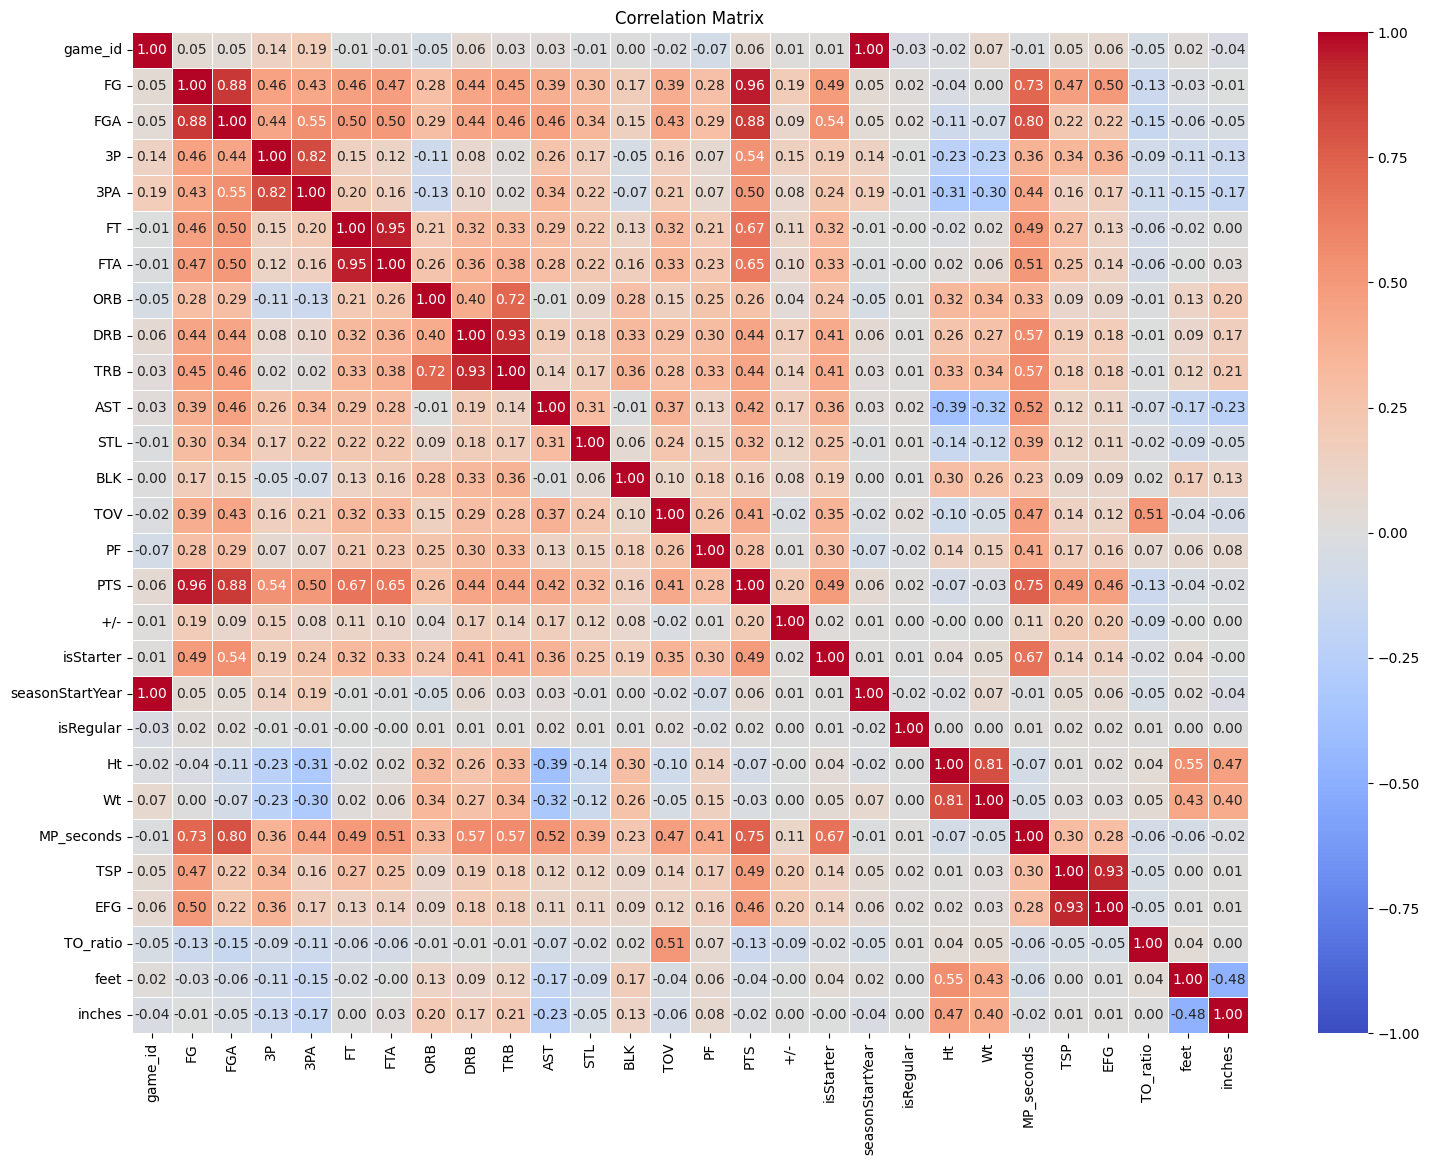

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#PEARSON CORRELATION
corr_matrix_pd = pd.DataFrame(correlation_matrix[0].toArray(), columns=numerical_columns)

plt.figure(figsize=(18, 13)) 
# Plot the heatmap
sns.heatmap(corr_matrix_pd, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", linewidths=.5,
            xticklabels=corr_matrix_pd.columns, yticklabels=corr_matrix_pd.columns)

plt.title("Correlation Matrix")
plt.show()

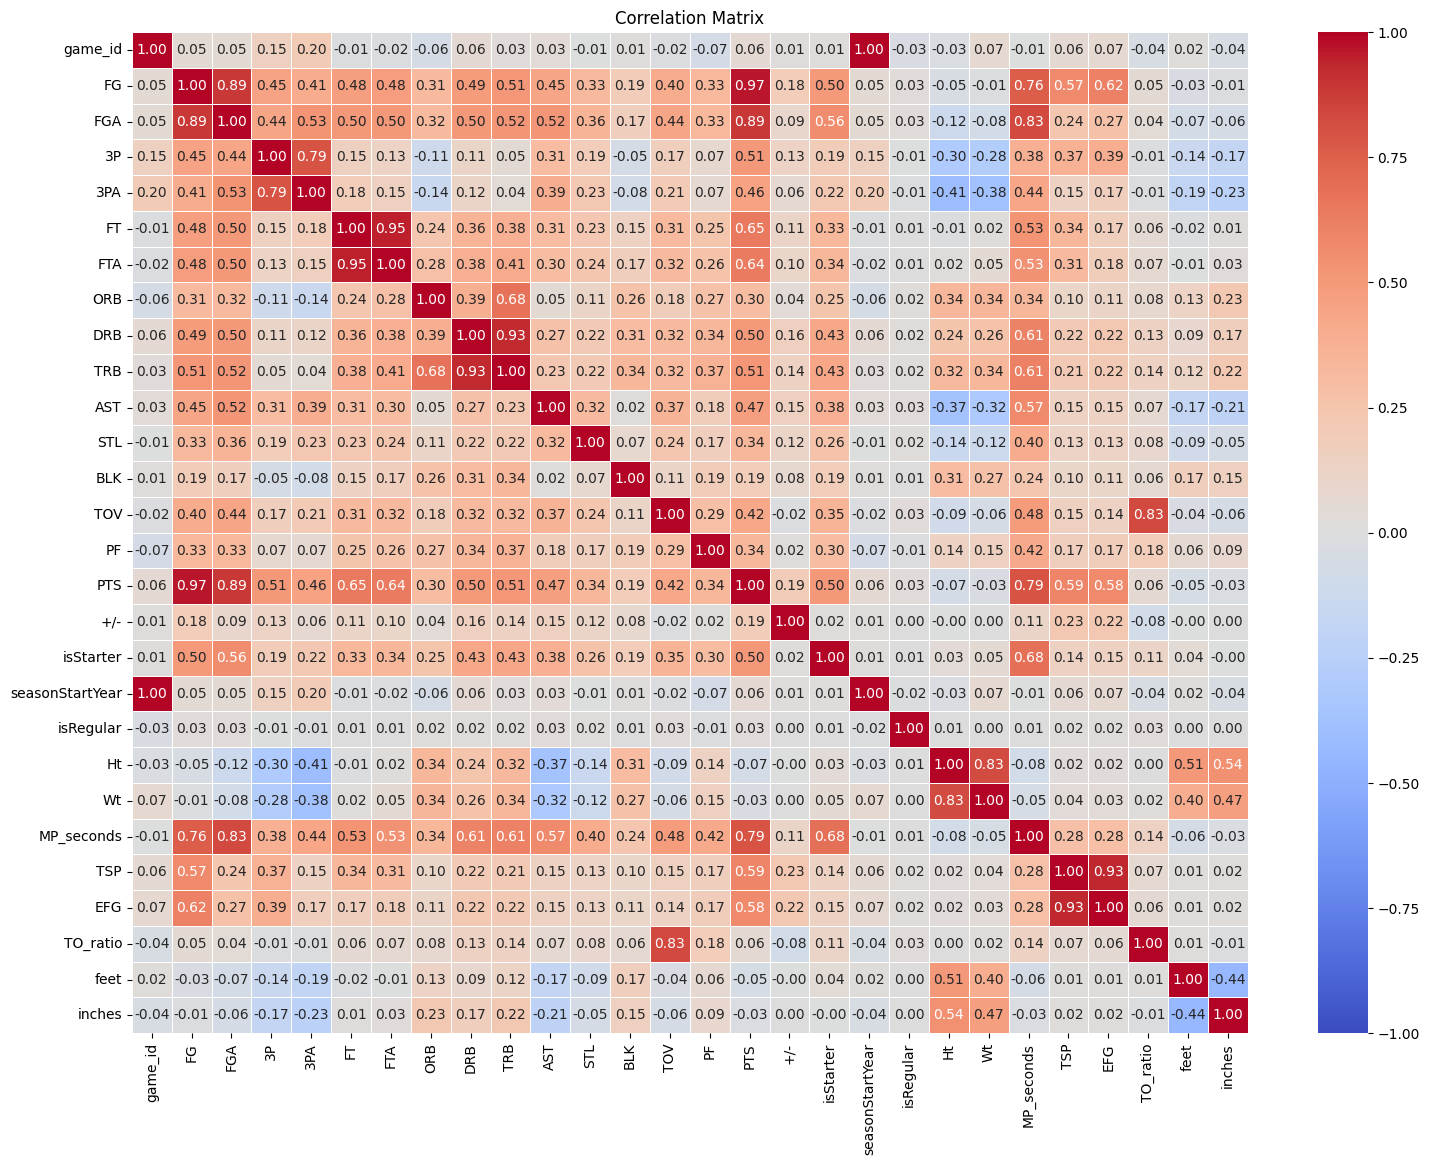

In [97]:
#SPEARMAN CORRELATION
spearman_matrix = Correlation.corr(assembled_df, "features", method="spearman").head()
corr_matrix_pd = pd.DataFrame(spearman_matrix[0].toArray(), columns=numerical_columns)

plt.figure(figsize=(18, 13)) 
# Plot the heatmap
sns.heatmap(corr_matrix_pd, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", linewidths=.5,
            xticklabels=corr_matrix_pd.columns, yticklabels=corr_matrix_pd.columns)

plt.title("Correlation Matrix")
plt.show()

In [98]:
# Removing correlated features
#df_boxscore = df_boxscore.drop("Pos")

# writing for better sharing

In [100]:
#writing csv for the sharing via github
output_path = "data/boxscore_clean"
df_boxscore.write.csv(output_path, header=True, mode="overwrite")

# output_path = "data/df_salaries_2000-2010"
# df_salaries.write.csv(output_path, header=True, mode="overwrite")

Py4JJavaError: An error occurred while calling o2159.csv.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.writeAndCommit(FileFormatWriter.scala:269)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeWrite(FileFormatWriter.scala:304)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:190)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:190)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$executeCollect$1(AdaptiveSparkPlanExec.scala:374)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:402)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.executeCollect(AdaptiveSparkPlanExec.scala:374)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:107)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:76)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:461)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:32)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:437)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:85)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:83)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:142)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:859)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:388)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:361)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:240)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:850)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:76)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1589)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:242)
	at org.apache.spark.util.SparkFileUtils.createTempDir(SparkFileUtils.scala:103)
	at org.apache.spark.util.SparkFileUtils.createTempDir$(SparkFileUtils.scala:102)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:94)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:372)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:964)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:194)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:217)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:91)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1120)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1129)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 25 more
